<a href="https://colab.research.google.com/github/PhuongAnh2212/CS313Assignment2/blob/main/7th_Assignment_2_CNN_Architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: CNN architectures {-}

This assignment aims at familiarizing you with training and testing the a CNN for an image classification task. You will go through the process of loading data, preprocessing images, building the CNN model, and evaluating its performance.

The assignment rqeuirements include:
- **2.1 (1 point)** Load the dataset.
- **2.2 (1 point)** Process, normalize, and resize the images.
- **2.3 (3 points)** Implement a CNN architecture selected from the models available in the TensorFlow Keras (from this list of models https://www.tensorflow.org/api_docs/python/tf/keras/applications, excluding VGG16 and VGG19).
- **2.4 (1 point)** Train and evaluate the CNN for the image classification task.
- **2.5 (2 points)** Modify the model by introducing enhancements such as skip connections or adjusting hyperparameters of the layers to improve its performance.
- **2.6 (1 point)** Train and evaluate the enhanced model on the test set.
- **2.7 (1 point)** Offer comments and observations regarding the impact of these modifications on the model’s effectiveness.


The dataset you will be working on is The CIFAR-10. This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment2-notebook.ipynb: Jupyter notebook containing source code.
- ./\<Test-accuracy>-\<StudentID>.txt: accuracy on the test, for example if you get 0.8124 accuracy, the name of this file is 08124-2012345.txt. The file content is left empty.

The submission folder is named DL4AI-\<StudentID>-Assignment2 (e.g., DL4AI-2012345-Assigment2) and then compressed with the same name.


    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy will be rewarded an extra credit.

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Note: to enable GPU training in Colab, go to Runtime > Change runtime type > Hardware acceleration > Choose GPU from the drop-down list.

!pip install tensorflow_datasets

# Import libraries
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras import Model

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# PLEASE DO NOT CHANGE THIS CODE

# Get the full dataset (batch_size=-1) in NumPy arrays from the returned tf.Tensor object
cifar10_train = tfds.load(name="cifar10", split=tfds.Split.TRAIN, batch_size=-1 )
cifar10_test = tfds.load(name="cifar10", split=tfds.Split.TEST, batch_size=-1)

# Convert tfds dataset to numpy array records
cifar10_train = tfds.as_numpy(cifar10_train)
cifar10_test = tfds.as_numpy(cifar10_test)

# Data processing and model training

In [4]:
# PLEASE DO NOT CHANGE THIS CODE

# Seperate feature X and label Y
X_train, Y_train = cifar10_train["image"], cifar10_train["label"]
X_test, Y_test = cifar10_test["image"], cifar10_test["label"]
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state=99, test_size=0.2)

# Normalize the image data
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

# Specify the input image size and number of classes
img_width, img_height = 32, 32
nb_classes = 10

# Converts a class vector (integers) to binary class matrix to have one-hot encoding label. For example:
Y_train = keras.utils.to_categorical(Y_train, nb_classes)
Y_val = keras.utils.to_categorical(Y_val, nb_classes)
Y_test = keras.utils.to_categorical(Y_test, nb_classes)

In [5]:
# Your code goes here
model_effinetv2s = tf.keras.applications.EfficientNetV2S(
    weights='imagenet', # None for random initialization, or 'imagenet' for using pre-training on ImageNet.
    include_top=False, # Whether to include the 3 fully-connected layers at the top of the network.
    input_shape=(img_width, img_height, 3)) # Specify input input_shape

In [6]:
print("Training set shape: " + str(X_train.shape))
print("validation set shape: " + str(X_val.shape))
print("Test set shape: " + str(X_test.shape))

Training set shape: (40000, 32, 32, 3)
validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [7]:
model_effinetv2s.summary()

Model: "efficientnetv2-s"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 32, 32, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 16, 16, 24)     │            648 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 16, 16, 24)     │             96 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 16, 16, 24)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 16, 16, 24)     │          5,184 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 16, 16, 24)     │             96 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 16, 16, 24)     │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_add (Add)         │ (None, 16, 16, 24)     │              0 │ block1a_project_activ… │
│                           │                        │                │ stem_activation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 16, 16, 24)     │          5,184 │ block1a_add[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 16, 16, 24)     │             96 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 16, 16, 24)     │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 16, 16, 24)     │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 16, 16, 24)     │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_add[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv  

 Total params: 20,331,360 (77.56 MB)

 Trainable params: 20,177,488 (76.97 MB)

 Non-trainable params: 153,872 (601.06 KB)

In [8]:
# Freeze the base model layers to retain the pre-trained features
for layer in model_effinetv2s.layers[-20:]:
    layer.trainable = False

In [9]:
last_layer = model_effinetv2s.get_layer('top_activation').output  # Use the final layer before the classification layer

In [10]:
# Custom classification layers with L2 regularization and Dropout
l2_reg = 1e-4  # Adjust the regularization factor as needed

In [11]:
from tensorflow.keras.regularizers import l2

In [12]:
x = Flatten()(last_layer)
x = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # 50% dropout rate

pred = Dense(10, activation='softmax', kernel_regularizer=l2(l2_reg))(x)

# Define the model
model_effinetv2s_cifar10 = Model(inputs=model_effinetv2s.input, outputs=pred)

In [13]:
model_effinetv2s_cifar10.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 32, 32, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 16, 16, 24)     │            648 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 16, 16, 24)     │             96 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 16, 16, 24)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 16, 16, 24)     │          5,184 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 16, 16, 24)     │             96 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 16, 16, 24)     │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_add (Add)         │ (None, 16, 16, 24)     │              0 │ block1a_project_activ… │
│                           │                        │                │ stem_activation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 16, 16, 24)     │          5,184 │ block1a_add[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 16, 16, 24)     │             96 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 16, 16, 24)     │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 16, 16, 24)     │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 16, 16, 24)     │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_add[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv  

 Total params: 20,497,130 (78.19 MB)

 Trainable params: 19,007,642 (72.51 MB)

 Non-trainable params: 1,489,488 (5.68 MB)

In [27]:
from tensorflow.keras.optimizers import Adam

# Compile the model with a SGD/momentum optimizer and a learning rate.
model_effinetv2s_cifar10.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              optimizer=Adam(learning_rate=1e-3), # Optimizer of Gradient descent (with momentum) as optimizer.
              metrics=['accuracy']) # Metric to evaludate the model performance

# Adjust the dropout rate in the classification layers if needed
x = Dropout(0.5)(x)  # Reduced dropout rate for regularization

In [43]:
# Data augmentation setup
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

# Fit the generator to your training data
datagen.fit(X_train)


# Define callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)

In [44]:
train_generator = datagen.flow(X_train, Y_train, batch_size=64)
steps_per_epoch = X_train.shape[0] // 64

In [97]:
history = model_effinetv2s_cifar10.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=(X_val, Y_val),  # Using your validation data for validation
    epochs=50,
    callbacks=[early_stop, lr_scheduler]  # Include any callbacks you've defined
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7950 - loss: 0.9894 - val_accuracy: 0.8118 - val_loss: 0.9836 - learning_rate: 1.0000e-07
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8118 - val_loss: 0.9836 - learning_rate: 1.0000e-07
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.7986 - loss: 0.9850 - val_accuracy: 0.7972 - val_loss: 1.0788 - learning_rate: 1.0000e-07
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7972 - val_loss: 1.0788 - learning_rate: 1.0000e-07
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7971 - loss: 0.9869 - val_accuracy: 0.8019 - val_loss: 1.0684 - learning_rate: 1.0000e-07
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8019 - val_loss: 1.0684 - learning_rate: 1.0000e-07
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━

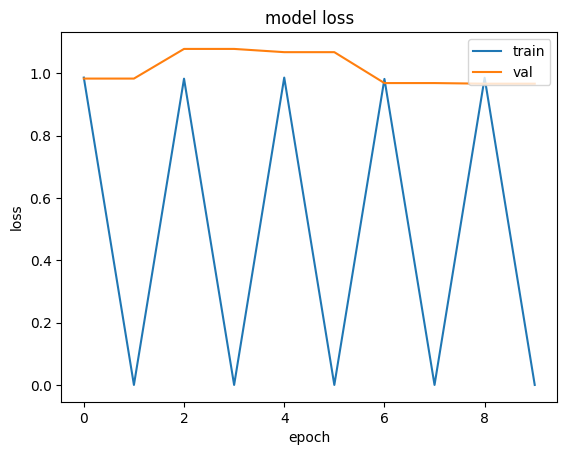

In [98]:
# Visualize the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

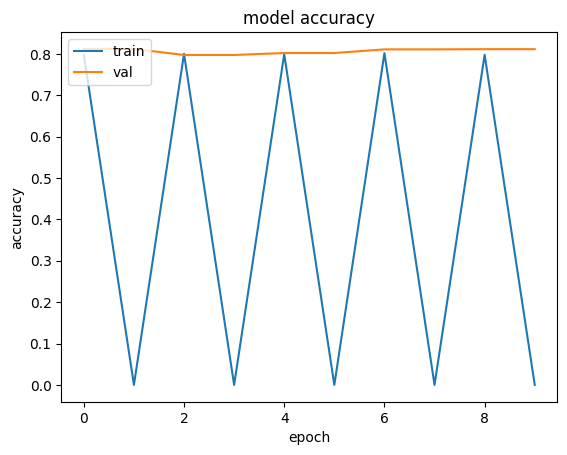

In [99]:
# Visualize the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [100]:
# Evaluate the model prediction on a data sample
pred = model_effinetv2s_cifar10.predict(X_test[:1]) # Make prediction on a data sample
print("Model prediction: " + str(pred)) # Model prediction
print("True label: " + str(Y_test[:1])) # True label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model prediction: [[0.06824297 0.01186405 0.07150318 0.09739646 0.04657929 0.03367577
  0.04673401 0.55290806 0.0215433  0.04955285]]
True label: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [101]:
# Evaluate the model prediction on the entire test set
preds = model_effinetv2s_cifar10.predict(X_test) # Make prediction on the entire test set
preds_index = np.argmax(preds, axis=1) # Get the index of maximum class probability of each of the data sample
label_index = np.argmax(Y_test, axis=1) # Get the index of maximum class label

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [102]:
# Compare the predictions with the true labels
comparison_result = np.equal(preds_index, label_index) # Return the comparison result which is an array of True/False.

# Calculate the number of correct predictions (True values in the comparison result array).
correct_preds = comparison_result.sum() # Compute the sum of elements across dimensions of a tensor.

# Show accuracy
print("Number of correct predictions: " + str(correct_preds))
print("Test accuracy: " + str(correct_preds/X_test.shape[0]))

Number of correct predictions: 8041
Test accuracy: 0.8041


In [103]:
# Evaluate the model accuracy using the function model.evaluate()
# model_eval = model_vgg16_cifar10.evaluate(X_test, Y_test, batch_size=4096)
model_eval = model_effinetv2s_cifar10.evaluate(X_test, Y_test, batch_size=4096)
print("List of metrics" + str(model_effinetv2s_cifar10.metrics_names)) # List of possible metrics of the model evaluation, this is the metrics specified in the model.compile().

print("Test loss: " + str(model_eval[0])) # Test loss
print("Test accuracy: " + str(model_eval[1])) # Test accuracy

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.8058 - loss: 1.0033
List of metrics['loss', 'compile_metrics']
Test loss: 0.9997265338897705
Test accuracy: 0.804099977016449
